<a href="https://colab.research.google.com/github/MountainFishCheng/MountainFishCheng/blob/main/ML00203_%E5%AF%B6%E5%8F%AF%E5%A4%A2%E5%88%86%E7%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   階層式集群,把寶可夢分成四群
*   參數設定為:n_clusters=4,mertic='euclidean', liknage='ward'
*   依據HP	Attack	Defense	SpecialAtk	SpecialDef做分類
*   將以上特徵標準化





In [ ]:
# import pandas as pd
# # 載入寶可夢資料
# # TODO

# # 取出目標欄位
# # TODO

# # 特徵標準化
# from sklearn.preprocessing import StandardScaler
# # TODO


# # 利用 Hierarchical Clustering 進行分群，除以下參數設定外，其餘為預設值
# # #############################################################################
# # n_clusters=4, affinity='euclidean', linkage='ward'
# # #############################################################################
# from sklearn.cluster import AgglomerativeClustering
# # TODO


# # 計算每一群的個數
# # TODO


# # 找到 Speed 有遺漏值的兩隻寶可夢，並填入組內平均
# # TODO



In [1]:
# import pandas as pd
# # 載入寶可夢資料
# # TODO
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_json('/content/drive/My Drive/Colab Notebooks/TQC+/data/pokemon.json')
data.head()

Mounted at /content/drive/


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,39,52,43,60,50,65.0
1,58,64,58,80,65,80.0
2,35,55,40,50,50,90.0
3,60,90,55,90,80,110.0
4,38,41,40,50,65,65.0


In [2]:
print('data shape:',data.shape)

data shape: (156, 6)


In [3]:
# # 取出目標欄位
# # TODO

X = data.iloc[:, :5] #取index 0~4的所有156筆資料
print(X)

     HP  Attack  Defense  SpecialAtk  SpecialDef
0    39      52       43          60          50
1    58      64       58          80          65
2    35      55       40          50          50
3    60      90       55          90          80
4    38      41       40          50          65
..   ..     ...      ...         ...         ...
151  43      29       31          29          31
152  43      29      131          29         131
153  83      89       71         173          71
154  97     107      101         127          89
155  88     112       75         102          80

[156 rows x 5 columns]


In [4]:
# # 特徵標準化
# from sklearn.preprocessing import StandardScaler
# # TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[-1.15734402e+00 -7.26710474e-01 -8.47871155e-01 -4.71568116e-01
  -7.89205934e-01]
 [-3.51715164e-01 -3.38024186e-01 -2.41693794e-01  1.16478456e-01
  -1.75262488e-01]
 [-1.32695010e+00 -6.29538902e-01 -9.69106627e-01 -7.65591402e-01
  -7.89205934e-01]
 [-2.66912126e-01  5.04129437e-01 -3.62929266e-01  4.10501742e-01
   4.38680958e-01]
 [-1.19974554e+00 -1.08300624e+00 -9.69106627e-01 -7.65591402e-01
  -1.75262488e-01]
 [ 2.84307621e-01  5.06621016e-02  4.45307215e-01  1.45880784e-01
   1.25727222e+00]
 [-1.11494251e+00  1.80224197e-01 -1.17116575e+00 -1.20662633e+00
  -9.93853749e-01]
 [-5.49045310e-02  9.89987297e-01 -1.60870146e-01 -4.71568116e-01
   2.93853273e-02]
 [-4.78919721e-01 -1.43681042e-01 -7.67047507e-01 -1.77544830e-01
  -7.89205934e-01]
 [ 1.00513344e+00  1.15193992e+00  6.47366335e-01  7.04525028e-01
   4.38680958e-01]
 [-1.75096529e+00 -1.76320724e+00 -1.97940223e+00  8.51536671e-01
  -5.84558119e-01]
 [-1.11494251e+00 -1.27734938e+00 -1.37322487e+00  1.29257160e+00

In [5]:
# # 利用 Hierarchical Clustering 進行分群，除以下參數設定外，其餘為預設值
# # #############################################################################
# # n_clusters=4, affinity='euclidean', linkage='ward'
# # #############################################################################
# from sklearn.cluster import AgglomerativeClustering
# # TODO

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
model.fit(X)

AgglomerativeClustering(n_clusters=4)

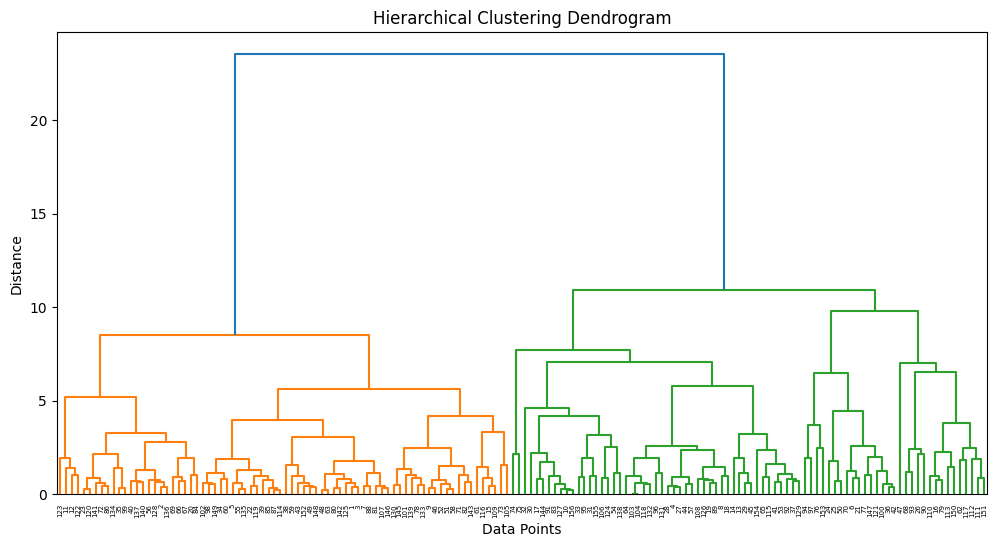

In [6]:
##額外: scipy.cluster.hierarchy 模組來繪製階層式分群的樹狀圖（dendrogram）
# 計算 linkage matrix
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np



distance_matrix = pdist(X, metric='euclidean')  # 計算距離矩陣
linkage_matrix = sch.linkage(distance_matrix, method='ward')  # 重新計算 linkage

# 繪製樹狀圖（**不加 labels**）
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, labels=np.arange(1,len(data)+1))
# sch.dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [7]:
# # 計算每一群的個數
# # TODO
labels = pd.Series(model.labels_, name='labels')
print(labels)

#計算最小群裡的個數
min = labels.value_counts().min()
#計算最大群裡的個數
max = labels.value_counts().max()

print('最小群有幾個元素:',min)
print('最大群有幾個元素:',max)

0      0
1      0
2      0
3      2
4      0
      ..
151    0
152    3
153    2
154    2
155    2
Name: labels, Length: 156, dtype: int64
最小群有幾個元素: 15
最大群有幾個元素: 76


In [8]:
print(data.columns)

Index(['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed'], dtype='object')


In [9]:
# # 找到 Speed 有遺漏值的兩隻寶可夢，並填入組內平均
# # TODO

#計算每個群的speed平均值
data = pd.concat([data,labels],axis=1)
speed_mean = data.groupby('labels')['Speed'].mean()

print("每一群Speed的平均數為:",round(speed_mean))



每一群Speed的平均數為: labels
0    58.0
1    57.0
2    92.0
3    82.0
Name: Speed, dtype: float64


In [12]:
# 找出有遺漏值的labels
nan_data = data[data['Speed'].isnull()]
print(nan_data)

    HP  Attack  Defense  SpecialAtk  SpecialDef  Speed  labels
19  60      48       45          43          90    NaN       0
63  70      75       60         105          60    NaN       2
